In [263]:
import requests, csv, yfinance, pytz, json
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/114.0.0.0 Safari/537.36"
}

BASE_URL = 'https://production.dataviz.cnn.io/index/fearandgreed/graphdata'
START_DATE = '2021-01-01'

r = requests.get('{}/{}'.format(BASE_URL, START_DATE),headers=headers)
data = r.json()


In [264]:
fg_data = data['fear_and_greed_historical']['data']
fear_greed_values = {}

for data in fg_data:
        dt = datetime.fromtimestamp(data['x'] / 1000, tz=pytz.utc)
        fear_greed_values[dt.date()] = int(data['y'])

In [265]:
fear_gread_values = pd.DataFrame(fear_greed_values.values(),index=fear_greed_values.keys(),columns = ['fear and greed index'])
fear_gread_values

,fear and greed index
2021-01-04,50
2021-01-05,50
2021-01-06,50
2021-01-07,50
2021-01-08,50
...,...
2025-05-19,69
2025-05-20,68
2025-05-21,65
2025-05-22,65


In [266]:
spy = yfinance.Ticker("SPY")
df = yfinance.download("SPY", start=START_DATE)
close = df['Close']

[*********************100%***********************]  1 of 1 completed


In [267]:
close.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2025-05-12', '2025-05-13', '2025-05-14', '2025-05-15',
               '2025-05-16', '2025-05-19', '2025-05-20', '2025-05-21',
               '2025-05-22', '2025-05-23'],
              dtype='datetime64[ns]', name='Date', length=1103, freq=None)

In [268]:
df_comb = fear_gread_values.merge(close,left_index=True,right_index=True)
df_comb = df_comb.reset_index()
df_comb

,index,fear and greed index,SPY
0,2021-01-04,50,347.254822
1,2021-01-05,50,349.646454
2,2021-01-06,50,351.736786
3,2021-01-07,50,356.962738
4,2021-01-08,50,358.996643
...,...,...,...
1098,2025-05-19,69,594.849976
1099,2025-05-20,68,592.849976
1100,2025-05-21,65,582.859985
1101,2025-05-22,65,583.090027


In [269]:
df_comb

,index,fear and greed index,SPY
0,2021-01-04,50,347.254822
1,2021-01-05,50,349.646454
2,2021-01-06,50,351.736786
3,2021-01-07,50,356.962738
4,2021-01-08,50,358.996643
...,...,...,...
1098,2025-05-19,69,594.849976
1099,2025-05-20,68,592.849976
1100,2025-05-21,65,582.859985
1101,2025-05-22,65,583.090027


c:\Users\bwava\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bwava\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bwava\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bwava\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

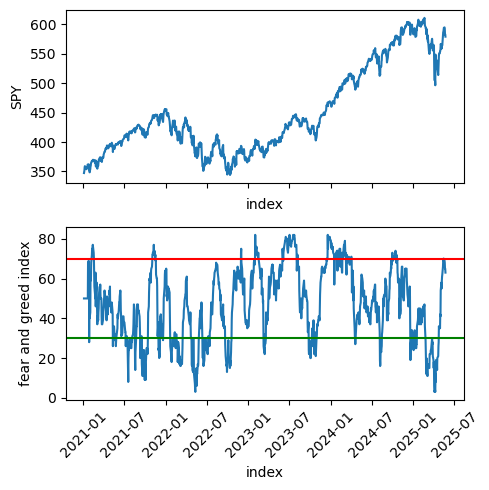

In [270]:
fig, axs = plt.subplots(2,1,figsize=(5,5))
sns.lineplot(data=df_comb, x = 'index',y='fear and greed index',ax=axs[1])
sns.lineplot(data=df_comb, x = 'index',y='SPY',ax=axs[0])
axs[0].set_xticklabels([])
axs[1].tick_params(axis='x', rotation=45)

axs[1].axhline(y=70,color='red')
axs[1].axhline(y=30,color='green')


plt.tight_layout()